# IMPORTING LIBRARIES

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt    #Importing pyplot interface using matplotlib

import seaborn as sns      #Importin seaborn library for interactive visualization

from sklearn.preprocessing import LabelEncoder     #Importing LabelEncoder to change the data type

from sklearn.preprocessing import StandardScaler    #Importing StandardScaler using sklearn library

from sklearn.model_selection import train_test_split     #To split the data into training and testing

from imblearn.over_sampling import SMOTE      #To Over sample the immbalance  the target feature

from sklearn.preprocessing import LabelEncoder   #To convert strings into float/integear

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay     #To generate classification report and acuracy score

In [ ]:
# Importing Dataset.
df = pd.read_csv("/content/drive/MyDrive/Internship/Diabetes Prediction/diabetes (1)_No BMI.csv")

In [ ]:
# Printing the number of rows and columns of a dataset as well as Dataset.
print('Shape of our Dataset -',df.shape)
df

Shape of our Dataset - (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Returns a list of column names in the dataset.
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Gives a summary of the dataset including column names, data types, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Gives descriptive statistics of a dataset.
df.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [ ]:
# Returns the data type of each feature of a dataset.
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# Value counts of the feature HeartDisease
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Observations
###### ⪼  We have 768 Rows of observations having 9 columns.
###### ⪼ 'Outcome' is our Output feature indicating whether the Patient  has a "Diabetes" (1) or is "Normal" (0).
###### ⪼  The feature "Outcome" is not evenly distributed
###### ⪼  dtype(data type) of features are fairly within use
###### ⪼ Visible Outliers are from features "Glucose"	"BloodPressure"	"SkinThickness"	"Insulin"	"BMI" having value 0

----------------------------------------------

# DATA PREPROCESSING

In [ ]:
# Checking null values in the dataset
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Checking duplicate values in the dataset
df.duplicated().any()

False

### Observations
##### ⪼ No missing values.
##### ⪼ No duplicates.

--------------------------

# EDA (Exploratory Data Analysis)

### Outliers

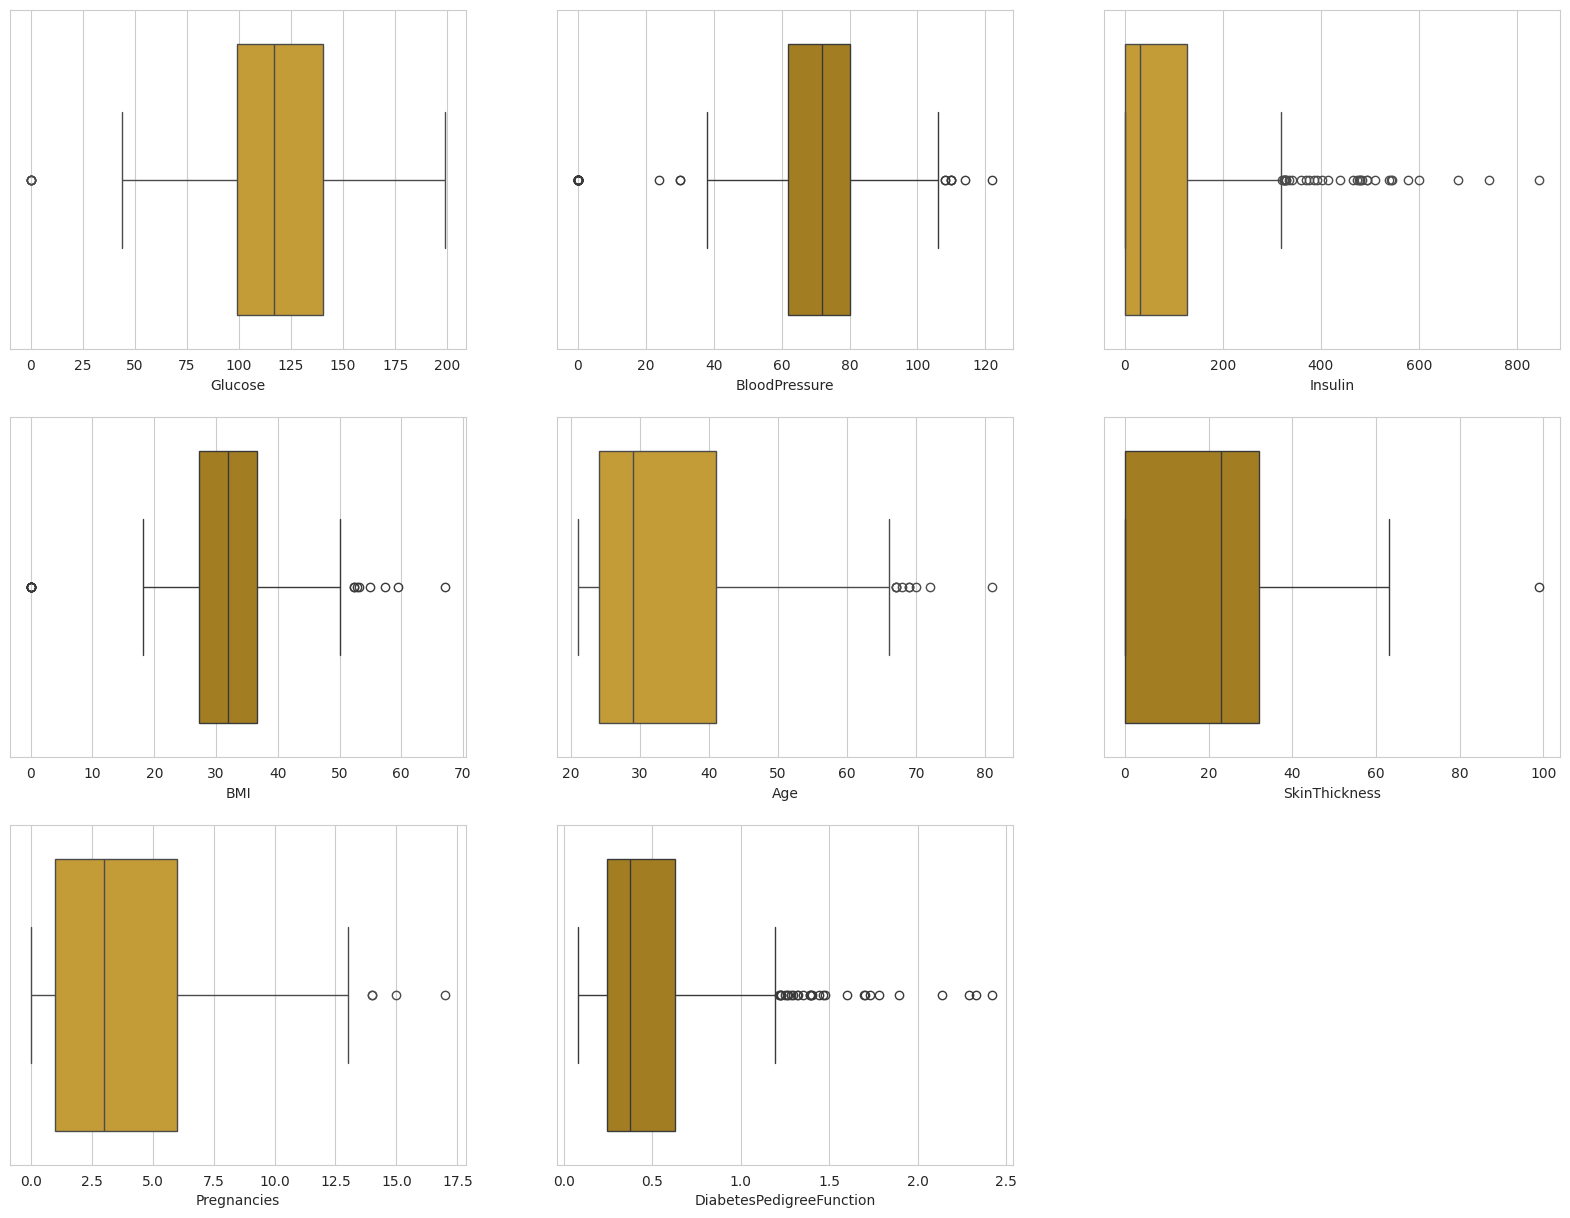

In [ ]:
# Observing for any Outliers for all features
plt.figure(figsize=(20,15))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=df, color='goldenrod')
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df, color='darkgoldenrod')
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df, color='goldenrod')
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df, color='darkgoldenrod')
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df, color='goldenrod')
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df, color='darkgoldenrod')
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df, color='goldenrod')
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df, color='darkgoldenrod')
plt.show()

 From the boxplot it is clear that many outliers
 - The feature such as "BloodPressure", "Insulin", "DiabetesPedigreeFunction" and "BMI" have plenty of outliers
 - The feature like "Pregnancies", "Glucose" and "SkinTickness" have few outliers

### Correlation

In [ ]:
# Returning the highest correlated features
corrmat = df.corr()
cols = corrmat.nlargest(5,'Outcome')['Outcome'].index
cols

# Returning the lowest correlated features
cols_negative = corrmat.nsmallest(4,'Outcome')['Outcome'].index
cols_negative

# Appending the both columns
c_h_m = []
for i in cols:
    c_h_m.append (i)
for j in cols_negative:
    c_h_m.append(j)
c_h_m

['Outcome',
 'Glucose',
 'BMI',
 'Age',
 'Pregnancies',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'DiabetesPedigreeFunction']

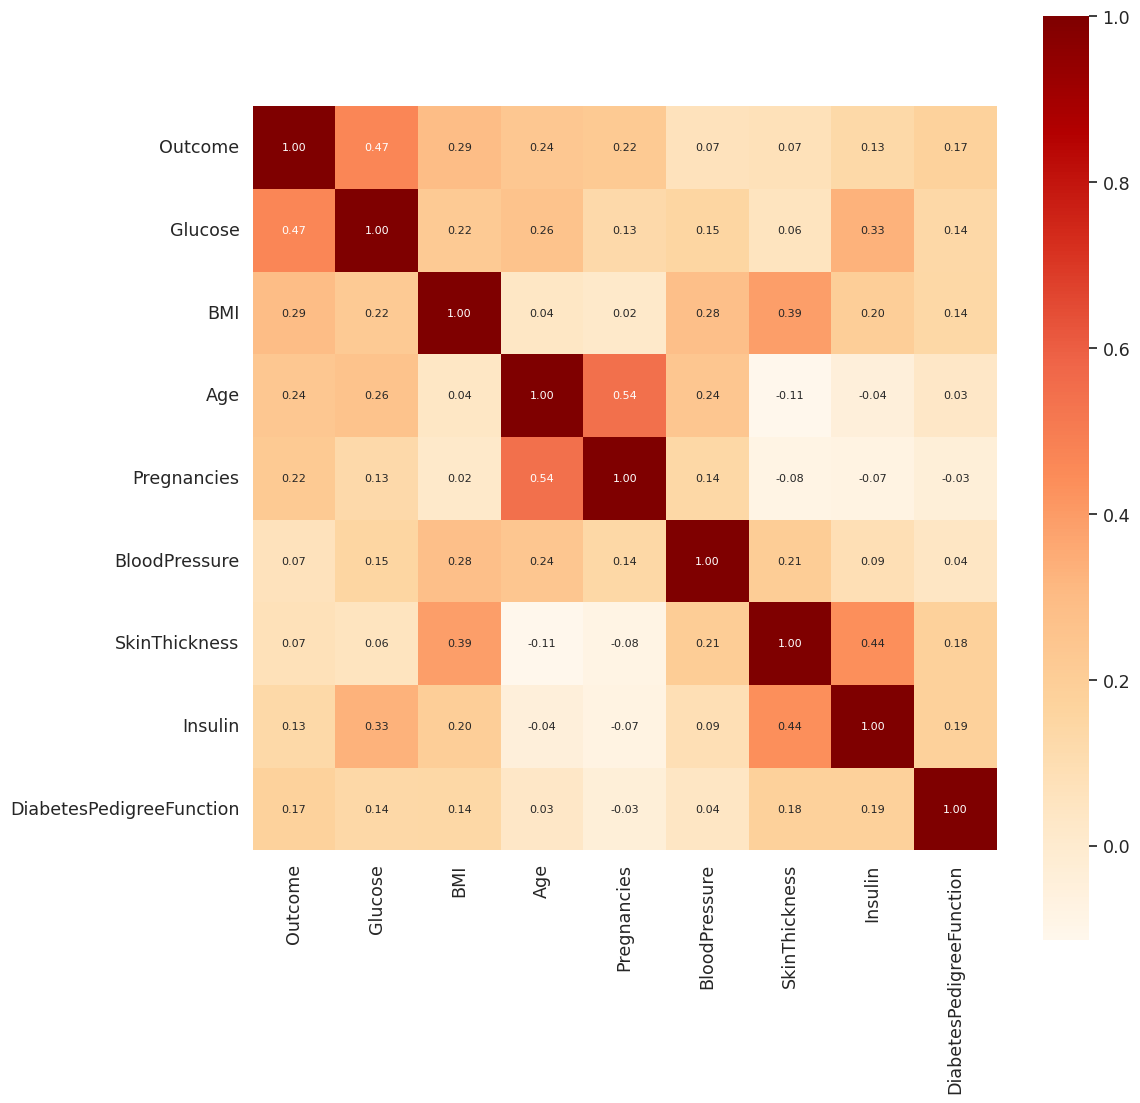

In [ ]:
# Heatmap of the Data frame showing Correlations with each other
corrmat = df[c_h_m].corr()
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(corrmat,
                 cmap='OrRd',
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 8},
                 yticklabels=corrmat.columns,
                 xticklabels=corrmat.columns)

- 'Glucose' feature has the higest correlation with the feature 'Outcome'
- 'Pregnancies' feature has the highest correlation with the feature 'Age'
- 'Insulin' feature has the highest correlation with the feature 'SkinTickness'

### Distribution Of Features

<ipython-input-15-1f5e01cb5be1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:, i], color = 'tan')
<ipython-input-15-1f5e01cb5be1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:, i], color = 'tan')
<ipython-input-15-1f5e01cb5be1>:5: UserWarning: 

`distplot` is a deprecat

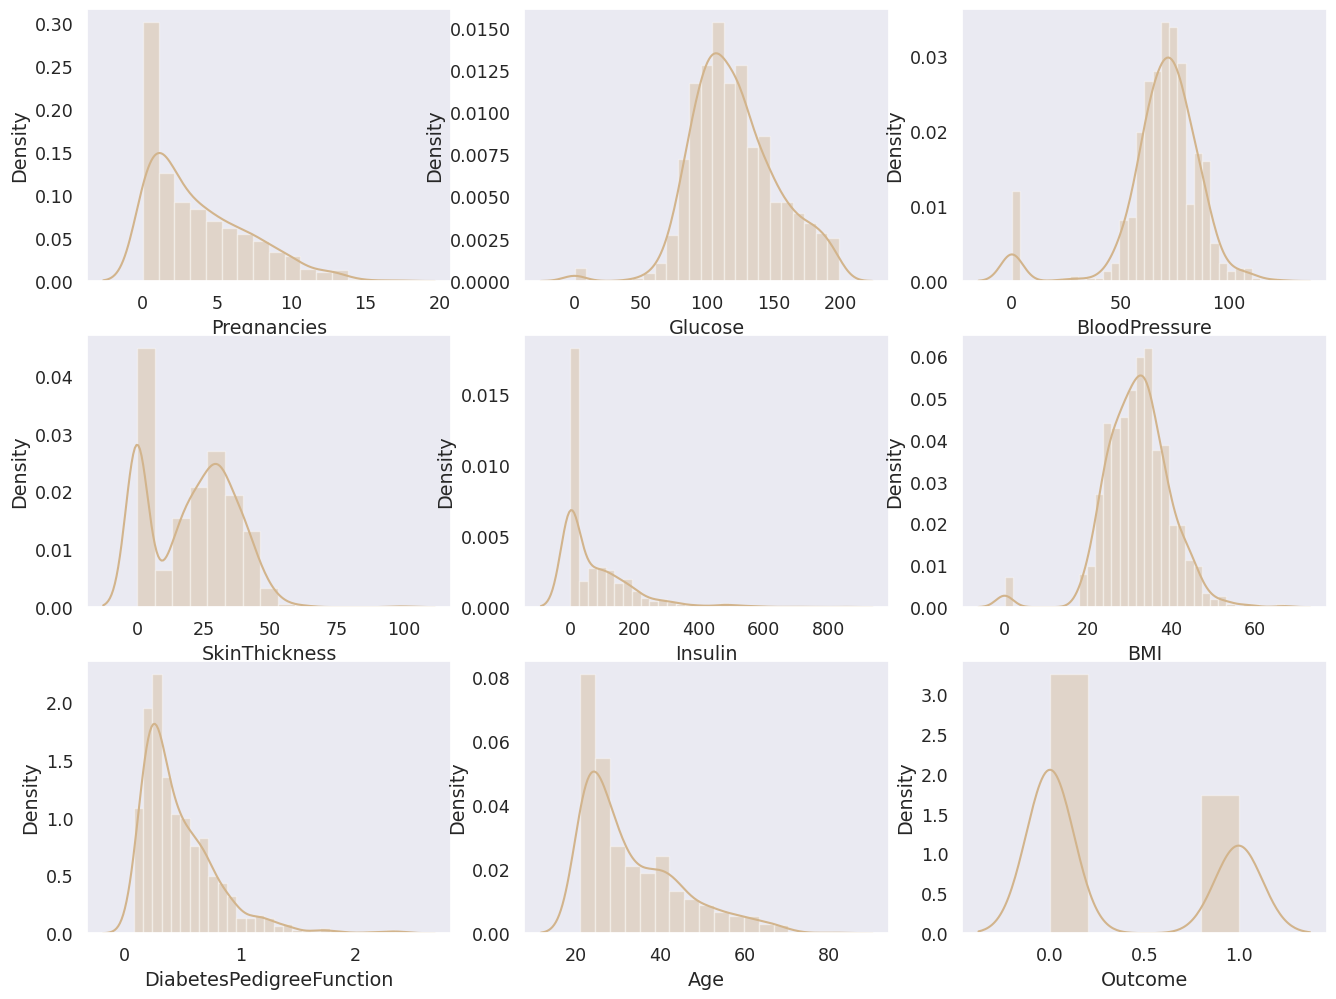

In [ ]:
plt.figure(figsize = (16, 12))

for i in range(len(df.columns)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df.iloc[:, i], color = 'tan')
    plt.grid()

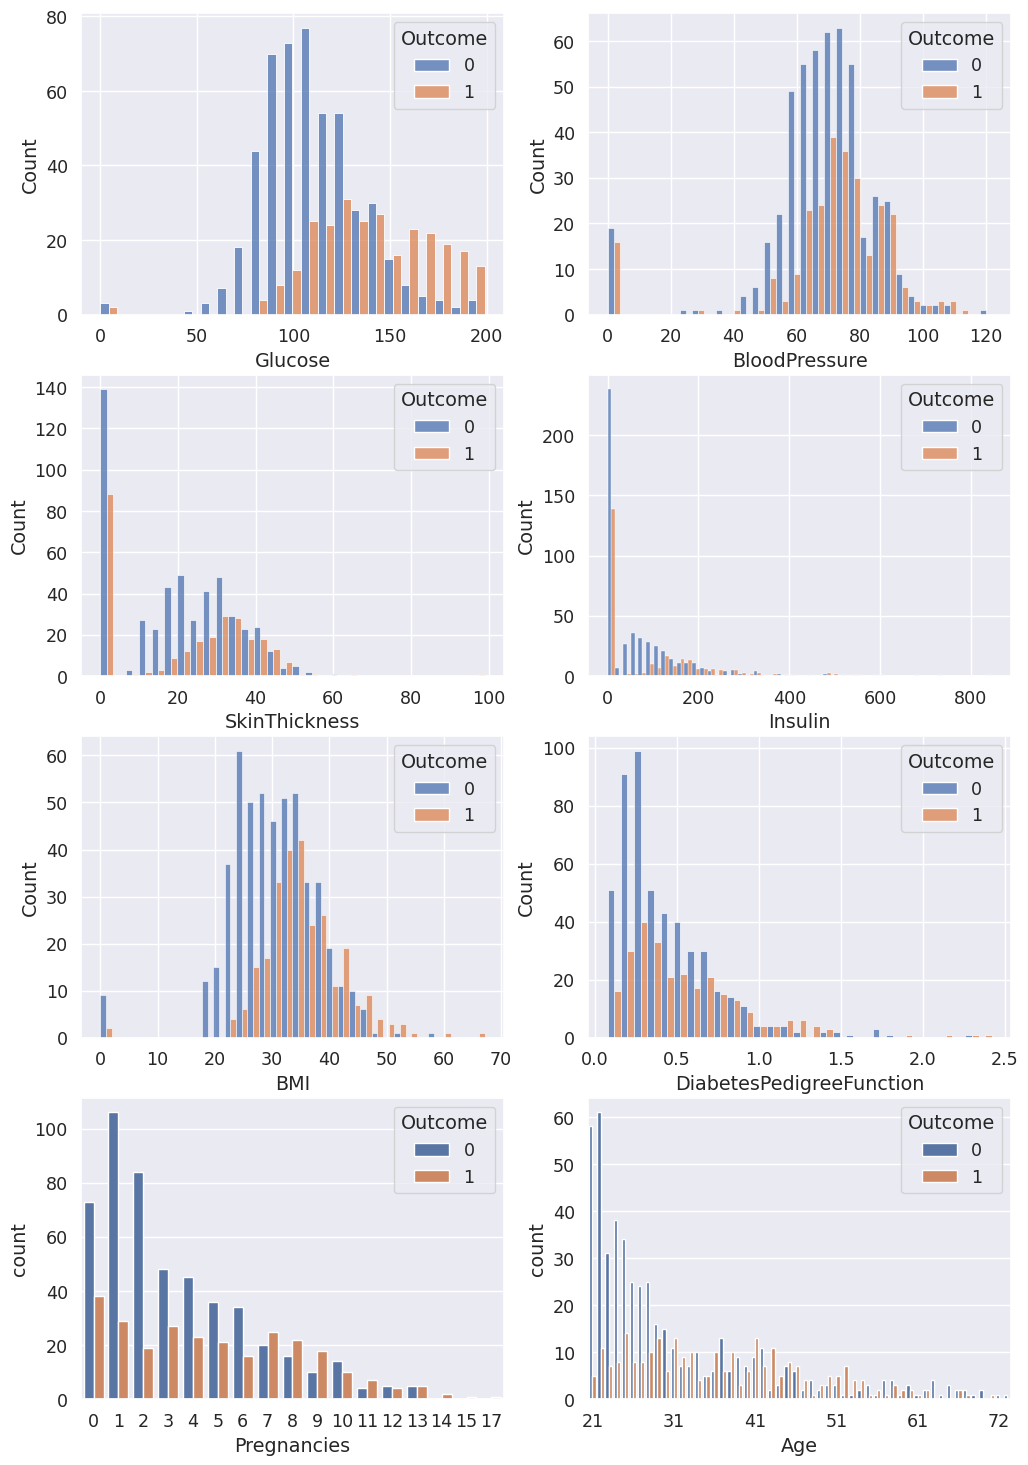

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(12,18))

hue = "Outcome"

sns.histplot(data=df, x='Glucose', ax=ax[0,0], hue=hue, multiple='dodge',color='tan')
sns.histplot(data=df, x='BloodPressure', ax=ax[0,1], hue=hue, multiple='dodge',color='darkgoldenrod')

sns.histplot(data=df, x='SkinThickness', ax=ax[1,0], bins=30, hue=hue, multiple='dodge')
sns.histplot(data=df, x='Insulin', ax=ax[1,1], bins=50, hue=hue, multiple='dodge')

sns.histplot(data=df, x='BMI', ax=ax[2,0], hue=hue, multiple='dodge')
sns.histplot(data=df, x='DiabetesPedigreeFunction', ax=ax[2,1], hue=hue, multiple='dodge')

sns.countplot(data=df, x='Pregnancies', ax=ax[3,0], hue=hue)
sns.countplot(data=df, x='Age', ax=ax[3,1], hue=hue)

ax[3,1].set_xticks([0,10,20,30,40,50]);

### Distribution of Outcome

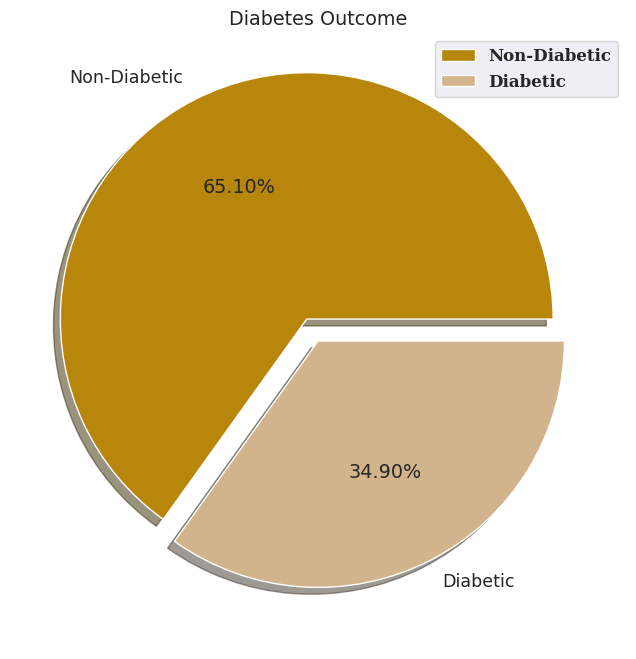

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Diabetes Outcome')
labels = ['Non-Diabetic', 'Diabetic']
colors = ['darkgoldenrod', 'tan']  # Define colors for each label

plt.pie(df['Outcome'].value_counts(), labels=labels, explode=(0.1, 0.0), autopct='%1.2f%%', shadow=True, colors=colors)
plt.legend(labels, loc='best', prop={'size': 12, 'family': 'serif', 'weight': 'bold'})  # Use the labels parameter for legend
plt.show()


## EDA of Features

### Age

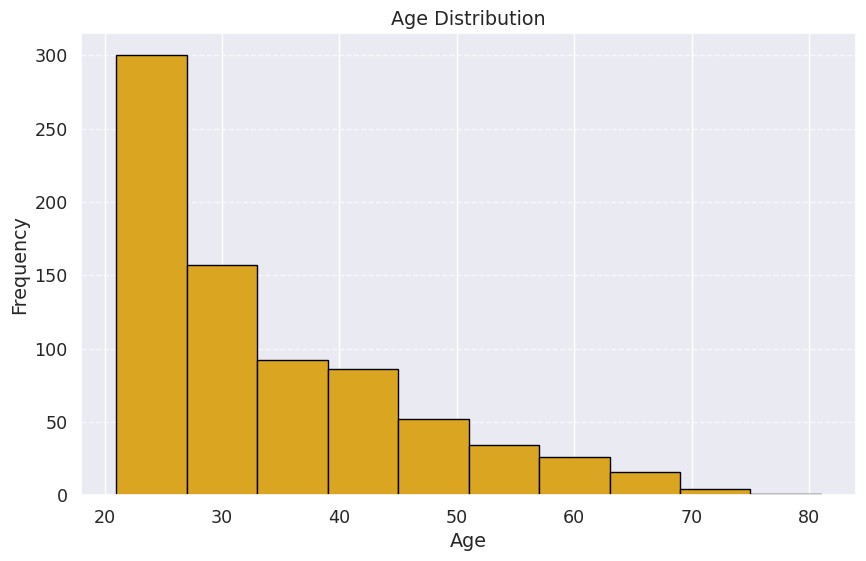

In [ ]:
# Ploting the graph for Age feature
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='goldenrod', edgecolor='black', alpha=1)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Most of the the Patients consists of ages from 20 to 45
- Older the age lower the Patients
- The ages are within parameters and are no visible outliers

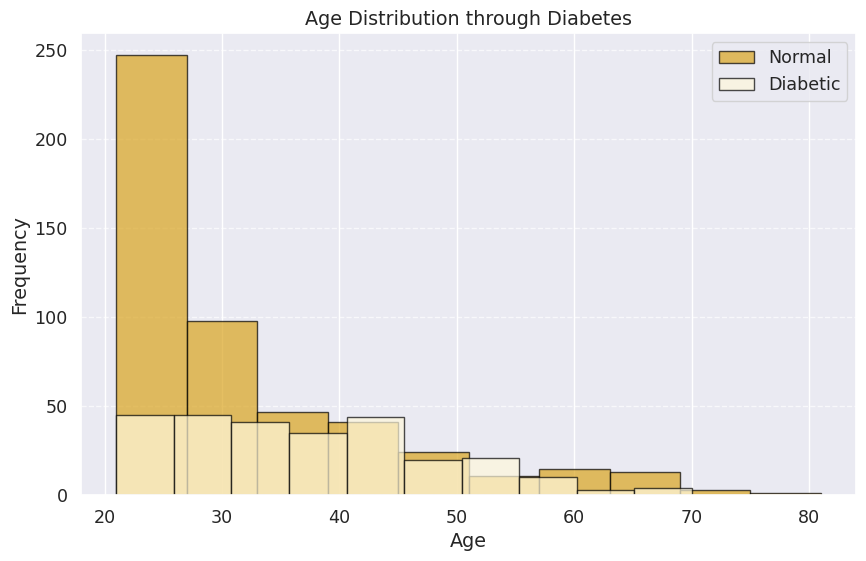

In [ ]:
Diabetic = df[df['Outcome'] == 1]['Age']
Normal = df[df['Outcome'] == 0]['Age']

plt.figure(figsize=(10, 6))

# Plotting histograms for each outcome
plt.hist(Normal, bins=10, color='goldenrod', edgecolor='black', alpha=0.7, label='Normal')
plt.hist(Diabetic, bins=10, color='cornsilk', edgecolor='black', alpha=0.7, label='Diabetic')


plt.title('Age Distribution through Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding legend
plt.legend()

plt.show()

- The ages between 40 to 45 have higher graphs of diabetes
- The ages after 70 have diminishing results of diabetes

### BloodPressure

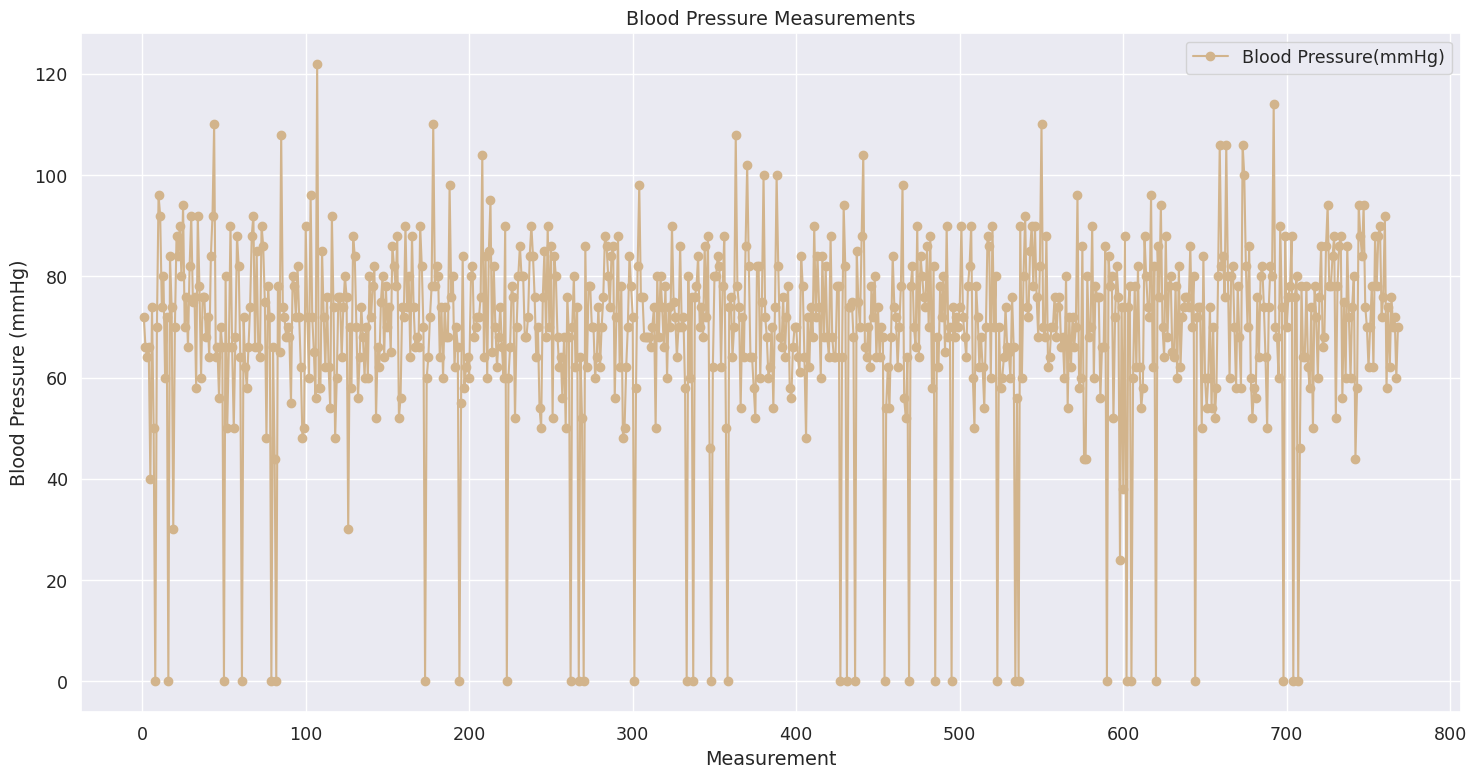

In [ ]:
# Observing the distribution of BloodPressure feature
# Generating indices as x-values
indices = np.array(range(1, len(df['BloodPressure']) + 1))
plt.figure(figsize=(15, 8))

# Ploting the feature
plt.plot(indices, df['BloodPressure'], label='Blood Pressure(mmHg)', marker='o',color='tan')

#labels and title
plt.xlabel('Measurement')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure Measurements')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Most of the Blood Pressure range lies in the 45mmHg to 85mmHg
- Multiple 0mmmHg values have been recorded which are obvious Outliers

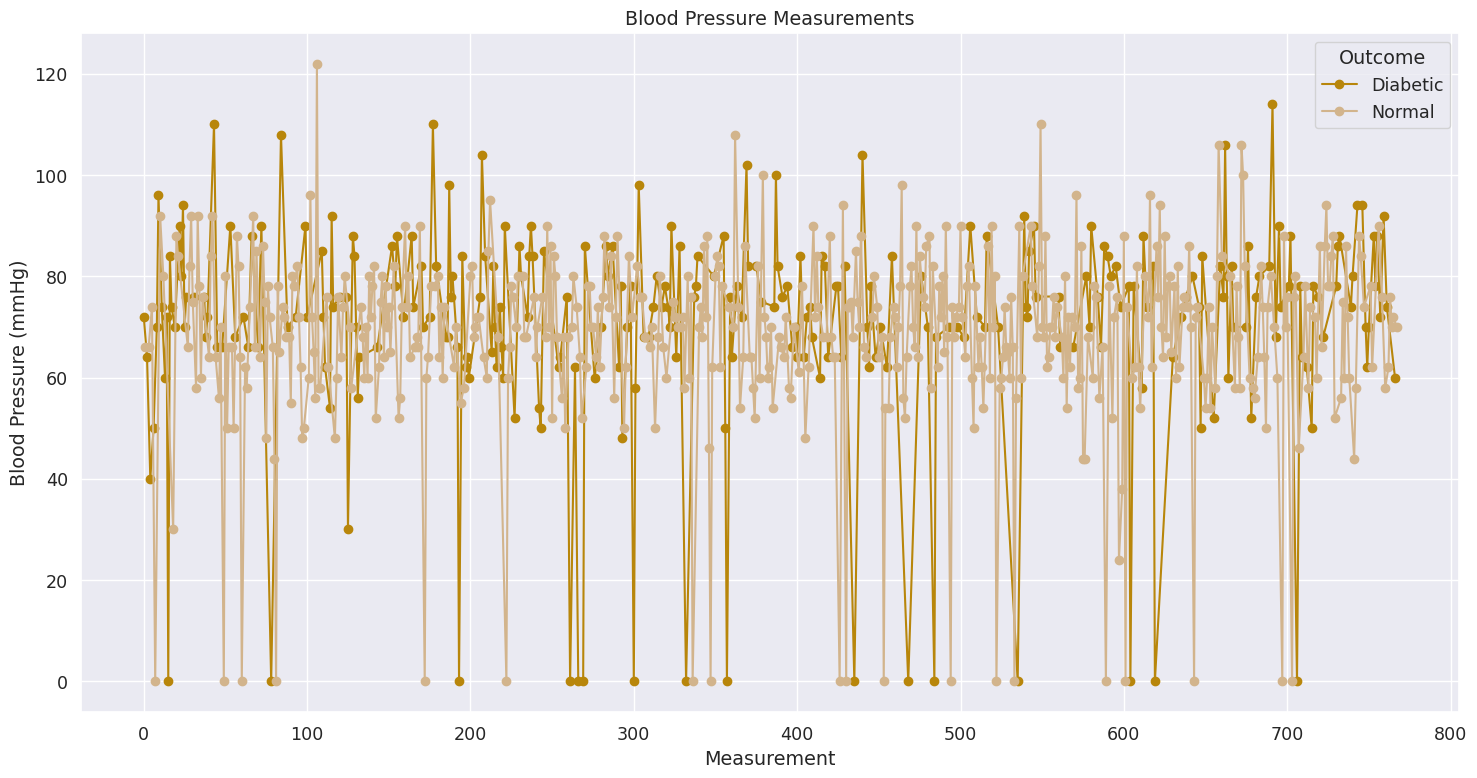

In [ ]:
# Observing the distribution of BloodPressure feature through seperation of Outcomes
# Separate blood pressure values for each class
Outcome_1_bp = df[df['Outcome'] == 1]['BloodPressure']
Outcome_0_bp = df[df['Outcome'] == 0]['BloodPressure']

plt.figure(figsize=(15, 8))
# Ploting blood pressure with Outcome 1
plt.plot(Outcome_1_bp.index, Outcome_1_bp, label='Diabetic', marker='o',color='darkgoldenrod')
# Ploting blood pressure with Outcome 0
plt.plot(Outcome_0_bp.index,Outcome_0_bp, label='Normal', marker='o',color='tan')

# labels and title
plt.xlabel('Measurement')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure Measurements')
plt.legend(title='Outcome')
plt.grid(True)
plt.tight_layout()
plt.show()

- Most of the Blood Pressure with Diabetes have slightly averagely higher Blood pressure
- Most of the Blood Pressure without Diabetes have slightly averagely lower Blood pressure

In [ ]:
# Observing Outliers in a table format of feature "BloodPressure"
q3=np.percentile(df['BloodPressure'],75)
q1=np.percentile(df['BloodPressure'],25)
iqr=q3-q1
minimum=q1-1.5*iqr
maximum=q3+1.5*iqr
outliers=df[~((df['BloodPressure']>45))]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
80,3,113,44,13,0,22.4,0.140,22,0
81,2,74,0,0,0,0.0,0.102,22,0
125,1,88,30,42,99,55.0,0.496,26,1


### BMI

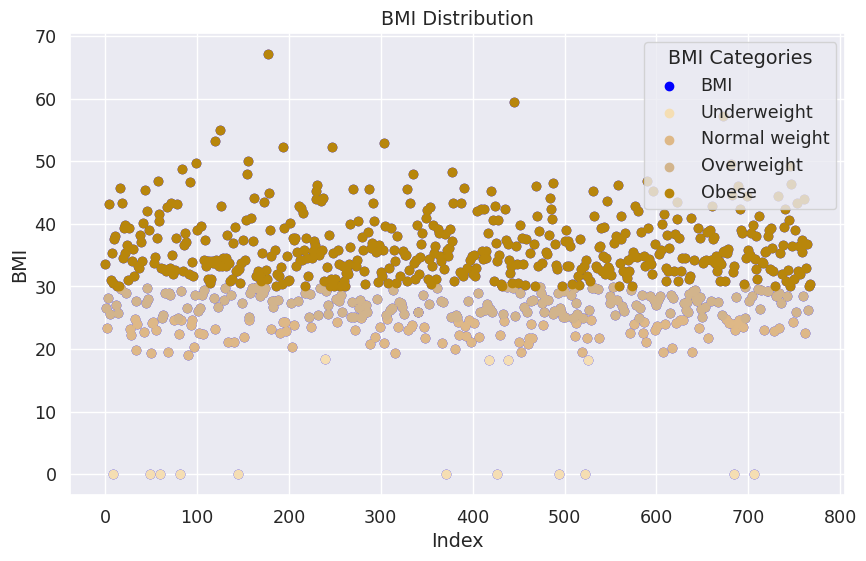

In [ ]:
# Scatter plot for BMI
# Defining BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
# BMI category column
df['BMI Category'] = df['BMI'].apply(bmi_category)

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['BMI'], c='blue', label='BMI')

# Plotting the range of BMI categories
for category, color in zip(['Underweight', 'Normal weight', 'Overweight', 'Obese'], ['Wheat', 'burlywood', 'tan', 'darkgoldenrod']):
    category_data = df[df['BMI Category'] == category]
    plt.scatter(category_data.index, category_data['BMI'], c=color, label=category)

plt.xlabel('Index')
plt.ylabel('BMI')
plt.title('BMI Distribution')
plt.legend(title = 'BMI Categories')
plt.grid(True)
plt.show()
plt.show()

In [ ]:
# Observing Outliers in a table format of feature "BMI"
q3=np.percentile(df['BMI'],75)
q1=np.percentile(df['BMI'],25)
iqr=q3-q1
minimum=q1-1.5*iqr
maximum=q3+1.5*iqr
outliers_bmi=df[~((df['BMI']>18) & (df['BMI']<45))]
outliers_bmi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI Category
9,8,125,96,0,0,0.0,0.232,54,1,Underweight
16,0,118,84,47,230,45.8,0.551,31,1,Obese
43,9,171,110,24,240,45.4,0.721,54,1,Obese
49,7,105,0,0,0,0.0,0.305,24,0,Underweight
57,0,100,88,60,110,46.8,0.962,31,0,Obese
60,2,84,0,0,0,0.0,0.304,21,0,Underweight
81,2,74,0,0,0,0.0,0.102,22,0,Underweight
84,5,137,108,0,0,48.8,0.227,37,1,Obese
92,7,81,78,40,48,46.7,0.261,42,0,Obese
99,1,122,90,51,220,49.7,0.325,31,1,Obese


### Glucose

<Figure size 1000x600 with 0 Axes>

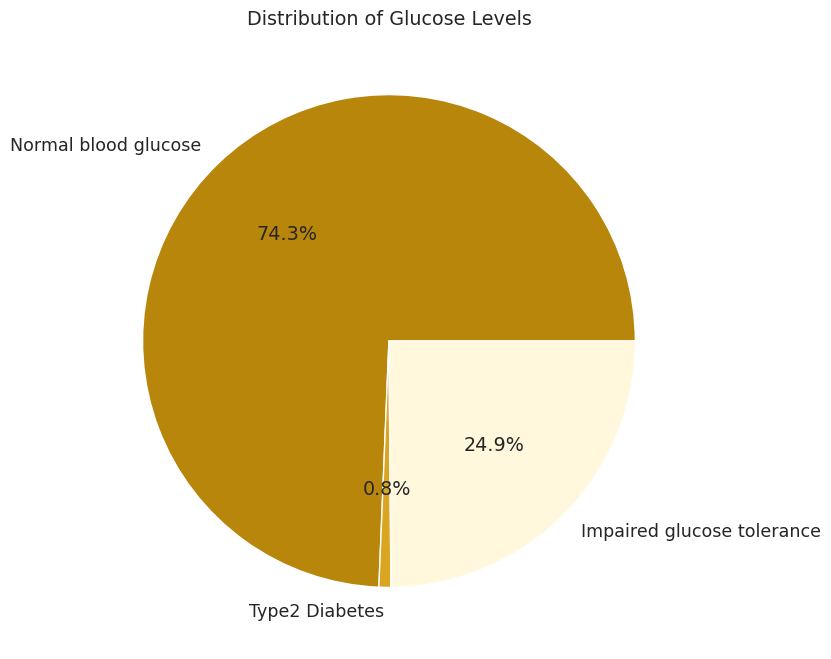

In [ ]:
# Defining Gluecose categories
def glucose_level(Glucose):
    if Glucose < 140:
        return 'Normal blood glucose'
    elif 141 <= Glucose < 199:
        return 'Impaired glucose tolerance'
    else:
        return 'Type2 Diabetes'

glucose_levels = df['Glucose']
plt.figure(figsize=(10, 6))

# Get corresponding categories
categories = [glucose_level(glucose) for glucose in glucose_levels]

# Count occurrences of each category
category_counts = {category: categories.count(category) for category in set(categories)}

# Ploting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', colors=['darkgoldenrod', 'goldenrod', 'cornsilk'])
plt.title('Distribution of Glucose Levels')
plt.show()

- Most of the patients have normal blood glucose
- Impaired glucose tolerance (prediabetes) are comparably lower

### Pregnancies

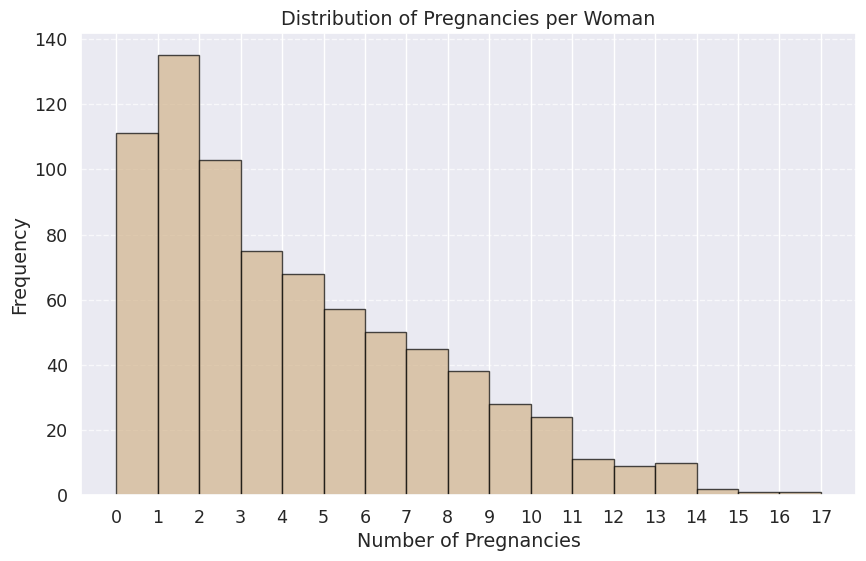

In [ ]:
pregnancies_data =df['Pregnancies']
plt.figure(figsize=(10, 6))
# Ploting the histogram of pregnancies
plt.hist(pregnancies_data, bins=range(18), color='tan', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.title('Distribution of Pregnancies per Woman')
plt.xticks(range(18))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Most of the females have a pregnancies of 0-3
- Lower the females goes where higher the no. of pregnancies

In [ ]:
# Observing Outliers in a table format of feature "Pregnancies"
q3=np.percentile(df['Pregnancies'],75)
q1=np.percentile(df['Pregnancies'],25)
iqr=q3-q1
minimum=q1-1.5*iqr
maximum=q3+1.5*iqr
outliers_p=df[(df['Pregnancies']>14)]
outliers_p

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI Category
88,15,136,70,32,110,37.1,0.153,43,1,Obese
159,17,163,72,41,114,40.9,0.817,47,1,Obese


### Skin Thickness

<Axes: ylabel='SkinThickness'>

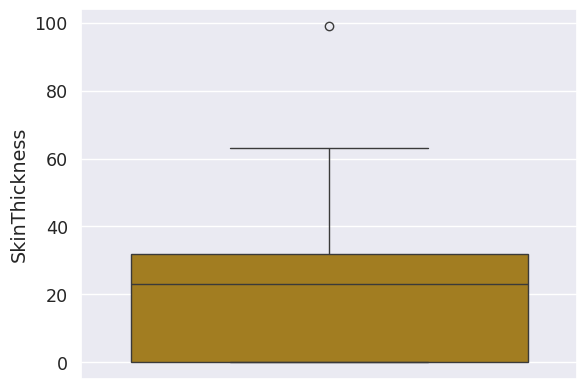

In [ ]:
# Observing for any Outliers for feature "MaxHR"
sns.boxplot(df['SkinThickness'],color='darkgoldenrod')

- Most of the Skin thickness falls between 0mm to 25mm

In [ ]:
# Observing Outliers in a table format of feature "skinthicness"
q3=np.percentile(df['SkinThickness'],75)
q1=np.percentile(df['SkinThickness'],25)
iqr=q3-q1
minimum=q1-1.5*iqr
maximum=q3+1.5*iqr
outliers_st=df[~((df['SkinThickness']>minimum) & (df['SkinThickness']<maximum))]
outliers_st

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI Category
579,2,197,70,99,0,34.7,0.575,62,1,Obese


### Replacing 0 with Median of the features

In [ ]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

### Label Encoding new feature (BMI Category)

In [ ]:
le = LabelEncoder()
df['BMI Category'] = le.fit_transform(df['BMI Category'])

----------------------

# SPLIT DATA INTO TEST AND TRAIN

In [ ]:
# Split the data into features (X) and target (y).
x=df.drop(columns='Outcome')
y=df['Outcome']

In [ ]:
# Standardize the feature data (x)
scaler = StandardScaler()
X = scaler.fit_transform(x)
print(X)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.46849198  1.4259954
  -0.21381236]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.36506078 -0.19067191
   1.32084081]
 [ 1.23388019  2.01597855 -0.68176235 ...  0.60439732 -0.10558415
  -1.74846552]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.68519336 -0.27575966
   1.32084081]
 [-0.84488505  0.14197684 -1.01212132 ... -0.37110101  1.17073215
  -0.21381236]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.47378505 -0.87137393
  -0.21381236]]


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### Over-Sampling using SMOTE

In [ ]:
sm=  SMOTE()

In [ ]:
X_os,y_os= sm.fit_resample(X,y)

In [ ]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.2, random_state=42,stratify=y_os)

In [ ]:
X_os,y_os= sm.fit_resample(X,y)

# MODEL TRAINING

### i) RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print("Randon Forest Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf)*100,"%")

Randon Forest Classifier
Confusion Matrix:
 [[84 16]
 [22 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


Accuracy Score: 75.32467532467533 %


#### Over-sampling

In [ ]:
rf.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [ ]:
y_pred_rf_os = rf.predict(X_test_os)

In [ ]:
print("Randon Forest Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test_os, y_pred_rf_os))
print("\nClassification Report:\n", classification_report(y_test_os, y_pred_rf_os))
print("\nAccuracy Score:", accuracy_score(y_test_os, y_pred_rf_os)*100,"%")

Randon Forest Classifier
Confusion Matrix:
 [[78 22]
 [10 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       100
           1       0.80      0.90      0.85       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Accuracy Score: 84.0 %


### ii) Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()

In [ ]:
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svm = clf.predict(X_test)

In [ ]:
print("Support Vector Machine")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm)*100,"%")

Support Vector Machine
Confusion Matrix:
 [[85 15]
 [26 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.65      0.52      0.58        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154


Accuracy Score: 73.37662337662337 %


#### Over-sampling

In [ ]:
clf.fit(X_train_os, y_train_os)

SVC()

In [ ]:
y_pred_svm_os = clf.predict(X_test_os)

In [ ]:
print("Randon Forest Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test_os, y_pred_svm_os))
print("\nClassification Report:\n", classification_report(y_test_os, y_pred_svm_os))
print("\nAccuracy Score:", accuracy_score(y_test_os, y_pred_svm_os)*100,"%")

Randon Forest Classifier
Confusion Matrix:
 [[78 22]
 [12 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       100
           1       0.80      0.88      0.84       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200


Accuracy Score: 83.0 %


### iii) Gradient Boosting Classifier (XGBoost)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
print("XGBoost Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_xgb)*100,'%')

XGBoost Model
Confusion Matrix:
 [[82 18]
 [20 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.63      0.64        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


Accuracy Score: 75.32467532467533 %


#### Over-sampling

In [ ]:
xgb.fit(X_train_os, y_train_os)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb_os = xgb.predict(X_test_os)

In [ ]:
print("XGBoost Model")
print("Confusion Matrix:\n", confusion_matrix(y_test_os, y_pred_xgb_os))
print("\nClassification Report:\n", classification_report(y_test_os, y_pred_xgb_os))
print("\nAccuracy Score:", accuracy_score(y_test_os, y_pred_xgb_os)*100,'%')

XGBoost Model
Confusion Matrix:
 [[77 23]
 [15 85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       100
           1       0.79      0.85      0.82       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200


Accuracy Score: 81.0 %


### iv) K-NN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn =  knn.predict(X_test)

In [ ]:
print("XGBoost Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_knn)*100,'%')

XGBoost Model
Confusion Matrix:
 [[88 12]
 [24 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.71      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154


Accuracy Score: 76.62337662337663 %


#### Over-sampling

In [ ]:
knn.fit(X_train_os, y_train_os)

KNeighborsClassifier()

In [ ]:
y_pred_knn_os = knn.predict(X_test_os)

In [ ]:
print("XGBoost Model")
print("Confusion Matrix:\n", confusion_matrix(y_test_os, y_pred_knn_os))
print("\nClassification Report:\n", classification_report(y_test_os, y_pred_knn_os))
print("\nAccuracy Score:", accuracy_score(y_test_os, y_pred_knn_os)*100,'%')

XGBoost Model
Confusion Matrix:
 [[73 27]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       100
           1       0.76      0.87      0.81       100

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200


Accuracy Score: 80.0 %


### v) Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb=  nb.predict(X_test)

In [ ]:
print("XGBoost Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_nb)*100,'%')

XGBoost Model
Confusion Matrix:
 [[74 26]
 [20 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       100
           1       0.57      0.63      0.60        54

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154


Accuracy Score: 70.12987012987013 %


#### Over-sampling

In [ ]:
nb.fit(X_train_os, y_train_os)

GaussianNB()

In [ ]:
y_pred_nb_os = nb.predict(X_test_os)

In [ ]:
print("XGBoost Model")
print("Confusion Matrix:\n", confusion_matrix(y_test_os, y_pred_nb_os))
print("\nClassification Report:\n", classification_report(y_test_os, y_pred_nb_os))
print("\nAccuracy Score:", accuracy_score(y_test_os, y_pred_nb_os)*100,'%')

XGBoost Model
Confusion Matrix:
 [[70 30]
 [26 74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71       100
           1       0.71      0.74      0.73       100

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200


Accuracy Score: 72.0 %


-------------------

### vi) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression()

In [ ]:
reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_reg =  reg.predict(X_test)

In [ ]:
print("Logistic Regression Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_reg))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_reg)*100,"%")

Logistic Regression Model
Confusion Matrix:
 [[81 19]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154


Accuracy Score: 70.12987012987013 %


#### Over-Sampling

In [ ]:
reg.fit(X_train_os, y_train_os)

LogisticRegression()

In [ ]:
y_pred_reg_os = reg.predict(X_test_os)

In [ ]:
print("Logistic Regression Model")
print("Confusion Matrix:\n", confusion_matrix(y_test_os, y_pred_reg_os))
print("\nClassification Report:\n", classification_report(y_test_os, y_pred_reg_os))
print("\nAccuracy Score:", accuracy_score(y_test_os, y_pred_reg_os)*100,"%")

Logistic Regression Model
Confusion Matrix:
 [[74 26]
 [21 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       100
           1       0.75      0.79      0.77       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200


Accuracy Score: 76.5 %


-----------

### vii) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt =  dt.predict(X_test)

In [ ]:
print("Decision Tree Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt)*100,"%")

Decision Tree Classifier
Confusion Matrix:
 [[80 20]
 [29 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.77       100
           1       0.56      0.46      0.51        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.64       154
weighted avg       0.67      0.68      0.67       154


Accuracy Score: 68.18181818181817 %


#### Over-Sampling

In [ ]:
dt.fit(X_train_os, y_train_os)

DecisionTreeClassifier()

In [ ]:
y_pred_dt_os = dt.predict(X_test_os)

In [ ]:
print("Decision Tree Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test_os, y_pred_dt_os))
print("\nClassification Report:\n", classification_report(y_test_os, y_pred_dt_os))
print("\nAccuracy Score:", accuracy_score(y_test_os, y_pred_dt_os)*100,"%")

Decision Tree Classifier
Confusion Matrix:
 [[80 20]
 [17 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.81      0.83      0.82       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200


Accuracy Score: 81.5 %


# MODEL EVALUATION

In [ ]:
RandomForestClassifier = accuracy_score(y_test, y_pred_rf)*100
XGBoost = accuracy_score(y_test, y_pred_xgb)*100
Support_Vector_Machine = accuracy_score(y_test, y_pred_svm)*100
Naive_Byes = accuracy_score(y_test, y_pred_nb)*100
Knn  = accuracy_score(y_test, y_pred_knn)*100
dt = accuracy_score(y_test, y_pred_dt)*100

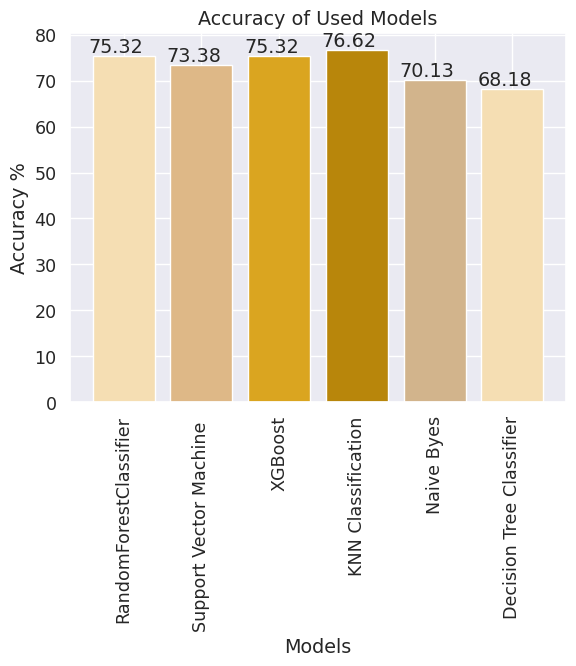

In [ ]:
# Summarizing the Accuracy Scores of the 5 Models

model_names = ['RandomForestClassifier', 'Support Vector Machine ', 'XGBoost','KNN Classification','Naive Byes','Decision Tree Classifier']
accuracy_values = [RandomForestClassifier, Support_Vector_Machine, XGBoost,Knn,Naive_Byes,dt ]
bars = plt.bar(model_names, accuracy_values, color=['Wheat', 'burlywood', 'goldenrod', 'darkgoldenrod','tan','wheat'])
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.title('Accuracy of Used Models')
plt.xticks(rotation=90)

for bar, value in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')
plt.show()

In [ ]:
RandomForestClassifier_os = accuracy_score(y_test_os, y_pred_rf_os)*100
XGBoost_os = accuracy_score(y_test_os, y_pred_xgb_os)*100
Support_Vector_Machine_os = accuracy_score(y_test_os, y_pred_svm_os)*100
Naive_Byes_os = accuracy_score(y_test_os, y_pred_nb_os)*100
Knn_os  = accuracy_score(y_test_os, y_pred_knn_os)*100
dt_os = accuracy_score(y_test_os, y_pred_dt_os)*100

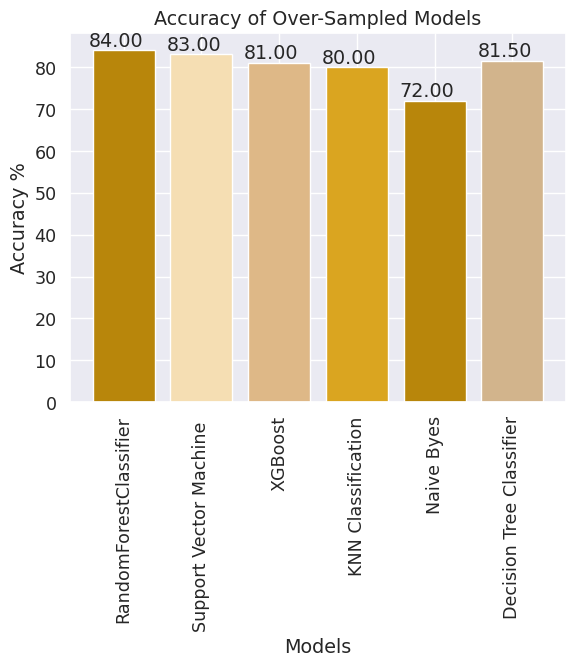

In [ ]:
# Summarizing the Accuracy Scores of the 6 Models which are Over-sampled

model_names = ['RandomForestClassifier', 'Support Vector Machine ', 'XGBoost','KNN Classification','Naive Byes','Decision Tree Classifier']
accuracy_values = [RandomForestClassifier_os, Support_Vector_Machine_os, XGBoost_os,Knn_os,Naive_Byes_os,dt_os ]
bars = plt.bar(model_names, accuracy_values, color=['darkgoldenrod','Wheat', 'burlywood', 'goldenrod', 'darkgoldenrod','tan','wheat'])
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.title('Accuracy of Over-Sampled Models')
plt.xticks(rotation=90)

for bar, value in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')
plt.show()

#### ROC-Curve

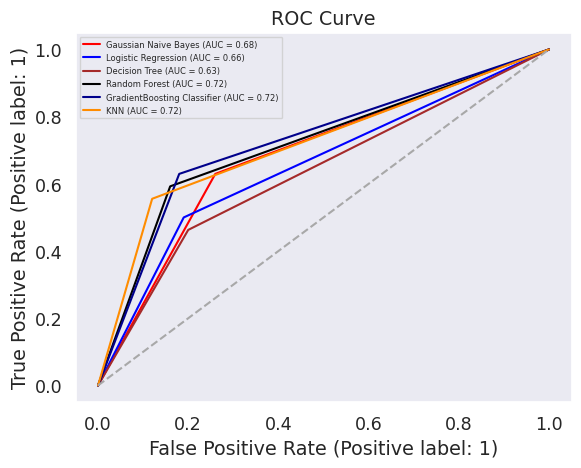

In [ ]:
# ROC Curve for 6 Models
fig, ax = plt.subplots()
plt.title('ROC Curve')
RocCurveDisplay.from_predictions(y_test, y_pred_nb, name = f'Gaussian Naive Bayes', ax=ax, color = 'red')
RocCurveDisplay.from_predictions(y_test, y_pred_reg, name = f'Logistic Regression', ax=ax, color = 'blue')
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name = f'Decision Tree', ax=ax, color = 'brown')
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name = f'Random Forest', ax=ax, color = 'black')
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, name = f'GradientBoosting Classifier', ax=ax, color = 'darkblue')
RocCurveDisplay.from_predictions(y_test, y_pred_knn, name = f'KNN', ax=ax, color = 'darkorange')

plt.plot([0, 1], [0, 1], linestyle = "--", color = '#A8A8A8')
plt.grid()
plt.legend(loc = 'best', fontsize = '6')

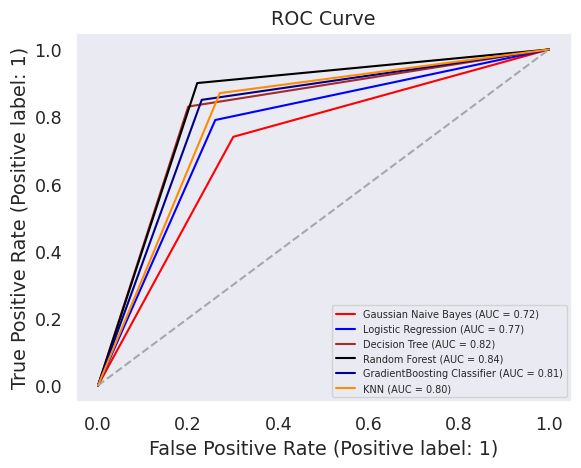

In [ ]:
# ROC Curve for 6 Over-Sampled Models
fig, ax = plt.subplots()
plt.title('ROC Curve')
RocCurveDisplay.from_predictions(y_test_os, y_pred_nb_os, name = f'Gaussian Naive Bayes', ax=ax, color = 'red')
RocCurveDisplay.from_predictions(y_test_os, y_pred_reg_os, name = f'Logistic Regression', ax=ax, color = 'blue')
RocCurveDisplay.from_predictions(y_test_os, y_pred_dt_os, name = f'Decision Tree', ax=ax, color = 'brown')
RocCurveDisplay.from_predictions(y_test_os, y_pred_rf_os, name = f'Random Forest', ax=ax, color = 'black')
RocCurveDisplay.from_predictions(y_test_os, y_pred_xgb_os, name = f'GradientBoosting Classifier', ax=ax, color = 'darkblue')
RocCurveDisplay.from_predictions(y_test_os, y_pred_knn_os, name = f'KNN', ax=ax, color = 'darkorange')

plt.plot([0, 1], [0, 1], linestyle = "--", color = '#A8A8A8')
plt.grid()
plt.legend(loc = 'best', fontsize = '7')

## Conclusion
- The study highlights the effectiveness of predictive modeling techniques in identifying individuals at risk of developing diabetes, leveraging demographic, lifestyle, and clinical data.

- Factors such as age, BMI, family history of diabetes, and physical activity levels emerge as significant predictors in our analysis, underlining the importance of these variables in diabetes risk assessment.

- Implementing machine learning algorithms enables the development of personalized risk assessment tools, empowering healthcare professionals to intervene proactively and mitigate the burden of diabetes through targeted preventive measures.